In [11]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
G = ox.graph_from_bbox(2.8765, 2.7503, -60.6267, -60.7805, network_type='drive', simplify=True)

In [52]:
highways_to_keep = ['primary', 'secondary']
H = nx.MultiDiGraph()
for u,v,attr in G.edges(data=True):
    if attr['highway'] in highways_to_keep:
        H.add_edge(u,v,attr_dict=attr)
        H.node[u].update(G.node[u])
        H.node[v].update(G.node[v])

In [23]:
H.add_edges_from([(3831463958,1710756548,{'attr_dict': {'osmid': 158973749, 'oneway': True, 'name': 'Avenida Getúlio Vargas', 'highway': 'secondary', 'length': 177.358}})])

[0]

In [53]:
def getDict(X, v1):
    for v,y,attr in X.edges(data=True):
        if (v1 == v):
            return attr['attr_dict']['length']


for u,v,attr in H.edges(data=True):
    if 'name' in H[u][v][0]['attr_dict'].keys():
        if H[u][v][0]['attr_dict']['name'] == 'Avenida Getúlio Vargas':
            print("=========================")
            lista_sucessores   = [n for n in H.successors(v)]
            lista_antecessores = [n for n in H.predecessors(u)]
            
            
            print(lista_sucessores)
            print("https://www.openstreetmap.org/#map=19/%f/%f" % (H.node[u]['y'],H.node[u]['x']))
            print("https://www.openstreetmap.org/#map=19/%f/%f" % (H.node[v]['y'],H.node[v]['x']))
            print (u,v,attr)
    #if 'name' in H[u][v][0]['attr_dict'].keys():
    #    if H[u][v][0]['attr_dict']['name'] == 'Avenida São Joaquim':
    #        print (u,v,attr)

[1710756548]
https://www.openstreetmap.org/#map=19/2.857861/-60.635919
https://www.openstreetmap.org/#map=19/2.856727/-60.636920
3831463958 1710756544 {'attr_dict': {'osmid': 158973749, 'oneway': True, 'name': 'Avenida Getúlio Vargas', 'highway': 'secondary', 'length': 168.06}}
[1067749204]
https://www.openstreetmap.org/#map=19/2.856727/-60.636920
https://www.openstreetmap.org/#map=19/2.856665/-60.636975
1710756544 1710756548 {'attr_dict': {'osmid': 158973749, 'oneway': True, 'name': 'Avenida Getúlio Vargas', 'highway': 'secondary', 'length': 9.298}}
[1673621115]
https://www.openstreetmap.org/#map=19/2.819241/-60.669523
https://www.openstreetmap.org/#map=19/2.818662/-60.669986
3648096831 3648096832 {'attr_dict': {'osmid': 91888069, 'oneway': True, 'name': 'Avenida Getúlio Vargas', 'highway': 'secondary', 'length': 83.884, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1d4e5fca58>}}
[1673621100]
https://www.openstreetmap.org/#map=19/2.818662/-60.669986
https://www.ope

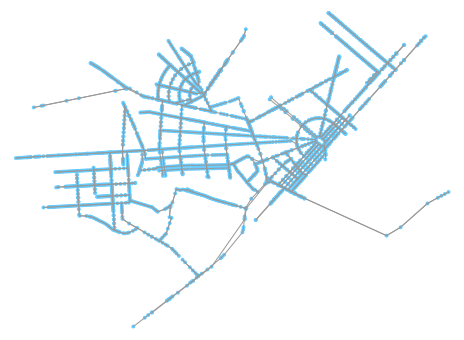

(<Figure size 580.651x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6fbc20e940>)

In [34]:
H.graph = G.graph
H_projected = ox.project_graph(H)
ox.plot_graph(H_projected)

In [7]:
ox.save_graphml(G, filename='network.graphml')

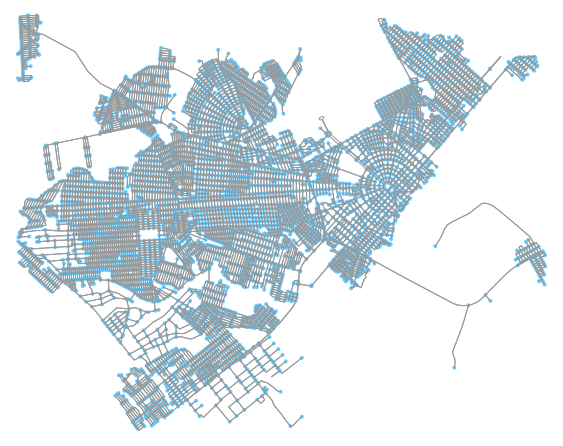

In [8]:
fig, ax = ox.plot_graph(G, show=True, save=True, filename='simples', file_format='svg')

In [12]:
fig2, ax2 = ox.plot_graph(H_projected, show=True, save=True, filename='avenida', file_format='svg')

NameError: name 'H_projected' is not defined